# Новый раздел

In [1]:
! wget https://www.dropbox.com/s/2xbg7gha4owwyfe/data.xlsx?dl=0

--2022-05-04 13:38:57--  https://www.dropbox.com/s/2xbg7gha4owwyfe/data.xlsx?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2xbg7gha4owwyfe/data.xlsx [following]
--2022-05-04 13:38:57--  https://www.dropbox.com/s/raw/2xbg7gha4owwyfe/data.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf736ae66c1347062c217d6b0f7.dl.dropboxusercontent.com/cd/0/inline/BkrMlqh6E__x0XlkdsIyAZt3epvIe338d3PcfPq0WXiojoRm71aoLkCChzg76rGgQbfDF1r3EPOWP20glt-_GBofrksH6dSb7qBdQ7FYUGxHLgu0x-qPi5v_IbDNwGL-ajfZfPvn-vbyWcsJOLFWjz-b0bzquLgGSds8okxjQvOSzw/file# [following]
--2022-05-04 13:38:58--  https://ucf736ae66c1347062c217d6b0f7.dl.dropboxusercontent.com/cd/0/inline/BkrMlqh6E__x0XlkdsIyAZt3epvIe338d3PcfPq0WXiojoRm71aoLkCChzg76rGgQbfDF1r3

In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_excel('data.xlsx?dl=0', sheet_name=1)

In [4]:
data

,date,fut price,exp fut,DateExp,Strike,shift,IV real,IV,share price,rate,exp option,Unnamed: 11
0,2019-02-27,18059.142454,1.060274,2020-03-20,18000,64,0.199670,0.199670,205.40,0.00752,1.054795,2020-03-18
1,2019-02-28,21287.000000,1.057534,2020-03-20,21250,15,0.234543,0.199670,207.80,0.00749,1.052055,2020-03-18
2,2019-03-01,21131.907517,1.054795,2020-03-20,21250,15,0.233394,0.199670,206.54,0.00738,1.049315,2020-03-18
3,2019-03-04,20007.000000,1.046575,2020-03-20,20000,10,0.259623,0.199670,205.50,0.00732,1.041096,2020-03-18
4,2019-03-05,20350.000000,1.043836,2020-03-20,20250,11,0.242435,0.199670,202.92,0.00737,1.038356,2020-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...
259,2020-03-11,19433.000000,0.024658,2020-03-20,19500,8,1.283998,0.779455,194.53,0.00640,0.019178,2020-03-18
260,2020-03-12,17598.000000,0.021918,2020-03-20,17500,0,1.290139,1.290139,175.91,0.00697,0.016438,2020-03-18
261,2020-03-13,19822.000000,0.019178,2020-03-20,19750,9,1.086523,1.290139,198.60,0.00676,0.013699,2020-03-18
262,2020-03-16,19633.000000,0.010959,2020-03-20,19750,9,1.086523,1.290139,195.85,0.00702,0.005479,2020-03-18


In [5]:
import pandas as pd
from scipy.stats import norm
"""Создаем функцию, которая считает цену фьючерса при различных сценариях"""
import math
def future_change(price,strike,time,r,std):
    changes=[]
    change=0
    changes.append(0)
    changes.append(0)
    changes.append(price*(1+1/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1+1/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1-1/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1-1/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1+2/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1+2/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1-2/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1-2/3*std)*np.exp(time*r)-strike)
    changes.append(price*(1+std)*np.exp(time*r)-strike)
    changes.append(price*(1+std)*np.exp(time*r)-strike)
    changes.append(price*(1-std)*np.exp(time*r)-strike)
    changes.append(price*(1-std)*np.exp(time*r)-strike)
    changes.append((price*(1+2*std)*np.exp(time*r)-strike)*0.35)
    changes.append((price*(1-2*std)*np.exp(time*r)-strike)*0.35)
    

    
    return changes
    

In [6]:
"""Создаем функцию, которая считает цену опциона"""
def option_price_share(price, strike, IV, time, r, put=False):
    ln=math.log(price/strike)
    d1=(r+(IV**2)/2)*time
    d2=(r-(IV**2)/2)*time
    denom=IV*math.sqrt(time)
    Nd1=norm.cdf((ln+d1)/denom, loc=0, scale=1)
    Nd2=norm.cdf((ln+d2)/denom, loc=0, scale=1)
    Nd_1=norm.cdf(-(ln+d1)/denom, loc=0, scale=1)
    Nd_2=norm.cdf(-(ln+d2)/denom, loc=0, scale=1)
    option=price*Nd1-strike*math.exp(-r*time)*Nd2
    if put:
        option=strike*math.exp(-r*time)*Nd_2-price*Nd_1
    return option

In [7]:
"""Создаем функцию, которая считает цену опциона при различных сценариях"""
def option_change(price, strike, IV, time, r, basic_std, delta_std, put=False):
    sc1=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price, strike, IV+delta_std, time, r, put=False)
    sc2=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price, strike, IV-delta_std, time, r, put=False)
    sc3=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+1/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc4=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+1/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc5=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-1/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc6=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-1/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc7=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc8=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc9=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc10=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2/3*basic_std, strike, IV-delta_std, time, r, put=False)
    sc11=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc12=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc13=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc14=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc15=(option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2*basic_std*price, strike, IV, time, r, put=False))*0.35
    sc16=(option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2*basic_std*price, strike, IV, time, r, put=False))*0.35
    changes=[-sc1,-sc2,-sc3,-sc4,-sc5,-sc6,-sc7,-sc8,-sc9,-sc10,-sc11,-sc12,-sc13,-sc14,-sc15,-sc16]
    if put:
        sc1=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price, strike, IV+delta_std, time, r, put=True)
        sc2=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price, strike, IV-delta_std, time, r, put=True)
        sc3=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+1/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc4=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+1/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc5=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-1/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc6=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-1/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc7=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc8=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc9=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc10=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2/3*basic_std, strike, IV-delta_std, time, r, put=True)
        sc11=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc12=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc13=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc14=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc15=(option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2*basic_std*price, strike, IV, time, r, put=True))*0.35
        sc16=(option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2*basic_std*price, strike, IV, time, r, put=True))*0.35
        changes=[-sc1,-sc2,-sc3,-sc4,-sc5,-sc6,-sc7,-sc8,-sc9,-sc10,-sc11,-sc12,-sc13,-sc14,-sc15,-sc16]
    return changes

In [8]:

def constrained_partitions(n, k, min_elem, max_elem,step):
    allowed = range(max_elem, min_elem-1, step)

    def helper(n, k, t):
        if k == 0:
            if n == 0:
                yield t
        elif k == 1:
            if n in allowed:
                yield t + (n,)
        elif min_elem * k <= n <= max_elem * k:
            for v in allowed:
                yield from helper(n - v, k - 1, t + (v,))

    return helper(n, k, ())

In [9]:

sale_fut = [] # здесь будут все возможные стратегии ликвидации фьючерсных контрактов
for p in constrained_partitions(1000, 4, 0, 500,-50):
  sale_fut.append(p)

In [10]:
def loss_calc(st, day):
  ls = 0
  q_c = [-1000,-1000,-1000,0]
  q_p = [1000,1000,1000,0]
  for k in range(len(sale_fut[st])):
    ls+=(1000-sale_fut[st][k])*(data['fut price'][day+k]-data['fut price'][day])
    
  ls+=-1000*(option_price_share(data['share price'][day+4],data['Strike'][day], data['IV'][day+4],
                                data['exp option'][day+4], data['rate'][day+4], put=False)-
             option_price_share(data['share price'][day],data['Strike'][day], data['IV'][day],
                                data['exp option'][day], data['rate'][day], put=False))
  ls+=1000*(option_price_share(data['share price'][day+4],data['Strike'][day], data['IV'][day+4],
                                data['exp option'][day+4], data['rate'][day+4], put=True)-
             option_price_share(data['share price'][day],data['Strike'][day], data['IV'][day],
                                data['exp option'][day], data['rate'][day], put=True))
  return ls


In [38]:



q_c = [-1000,-1000,-1000,0]
q_p = [1000,1000,1000,0]
sale_call=[0,0,0,1000]
sale_put=[0,0,0,1000]
margins = [] # маржинальные требования по всему ряду
final_losses=[] #фактические убытки по всему ряду
sale_fut_n = [500,500,0,0] # наивная стратегия ликвидации фьючерсов
#for d in range(0, data.shape[0],5): # идем по массиву данных с интервалом 5 дней
sum_lt_naive=[]
opt_strat=[]
#for d in range(0, 5,5):
for d in range(0, 261,5): # идем по массиву данных с интервалом 5 дней
  risk_final_scenarios=[] # убытки по дням по всем стратегиям
  sum_lt = [] # маржа по всем стратегиям
  sum_losses = [] 
  r=data['rate'][d]
  fut_strike=data['fut price'][d]
  option_strike=data['Strike'][d]
  price = data['share price'][d]
  IV = data['IV'][d]
  fut_time = data['exp fut'][d]
  option_time = data['exp option'][d]
  
  print(d)
  lr=0
  lt=[]
  losses=[]
  call_price0 = option_price_share(price, option_strike, IV, option_time,r)
  put_price0 = option_price_share(price, option_strike, IV, option_time,r, put=True)

  lt_naive = [] # убытки по дням для наивной стратегии
  std=0.01
  delta_std=0.005
  scenarios_fut=[]
  scenarios_put=[]
  scenarios_call=[]
  q_fut_n=1000
  for i in range(1,len(sale_fut_n)+1): # перебираем все дни внутри наивной стратегии
  #for i in range(1,2):
    lnr=0
    
    std=0.01
    delta_std=0.005
    std=std+i*0.001
    delta_std=delta_std+(i)*0.001
    fut_time=max(0.00000000000001,fut_time - (i)/365)
    option_time=max(0.00000000000001, option_time-(i)/365)
    std_lnr=std+(i+1)*0.001
    delta_std_lnr=delta_std+(i+1)*0.001
    fut_time_lnr=max(0.00000000000001,fut_time - (i+1)/365)
    option_time_lnr=max(0.00000000000001, option_time-(i+1)/365)
    q_fut_n=q_fut_n-sale_fut_n[i-1]

    scenarios_fut.append(future_change(price,fut_strike,fut_time_lnr,r,std_lnr))
    scenarios_call.append(option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=False))
    scenarios_put.append(option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=True))
    """

    lnr=min([sum(a) for a in zip(*[[k*q_fut_n for k in future_change(price,fut_strike,fut_time_lnr,r,std_lnr)],
                                  [h*q_c[i-1] for h in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=False)],
                                  [v*q_p[i-1] for v in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=True)]])])
    """
    #print(q_fut_n)
    #print(q_c[i-1])
    #print(sale_fut_n[i-1])
    lnr=min([sum(a) for a in zip(*[[k*q_fut_n for k in scenarios_fut[i-1]],
                                 [h*q_c[i-1] for h in scenarios_call[i-1]],
                                 [v*q_p[i-1] for v in scenarios_put[i-1]]])])
    
    #print([k*q_fut_n for k in future_change(price,fut_strike,fut_time_lnr,r,std_lnr)])
    #print([h*q_c[i-1] for h in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=False)])
    #print([v*q_p[i-1] for v in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=True)])
    
    #print(lnr)

    lr+=min([sum(b) for b in zip(*[[k*sale_fut_n[i-1] for k in scenarios_fut[i-1]],
                                        [h*sale_call[i-1] for h in scenarios_call[i-1]],
                                        [h*sale_put[i-1] for h in scenarios_put[i-1]]])])
    """
    lr+=min([sum(b) for b in zip(*[[k*sale_fut_n[i-1] for k in future_change(price,fut_strike,fut_time,r,std)],
                                        [h*sale_call[i-1] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)],
                                        [h*sale_call[i-1] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)]])])
    """
    #print(lr)
    lt_naive.append(lr+lnr)

    
  sum_lt_naive.append(sum(lt_naive))
  print('naive', sum(lt_naive))
  lr=0
  lr_real=0
  
  for j in range(0,len(sale_fut)): # перебираем все возможные стратегии
    risk_final_max=[] # наихудшие убытки внутри стратегии
    lnr=0
    lr=0
    lnr_real=0
    lr_real=0

    q_fut=1000
    std=0.01
    delta_std=0.005
    lt=[]
    losses=[]
    for i in range(1,len(sale_fut[j])+1): # перебираем все дни внутри одной стратегии
        
        std=std+i*0.001
        delta_std=delta_std+(i)*0.001
        fut_time=max(0.00000000000001,fut_time - (i)/365)
        option_time=max(0.00000000000001, option_time-(i)/365)
        std_lnr=std+(i+1)*0.001
        delta_std_lnr=delta_std+(i+1)*0.001
        fut_time_lnr=max(0.00000000000001,fut_time - (i+1)/365)
        option_time_lnr=max(0.00000000000001, option_time-(i+1)/365)
        q_fut=q_fut-sale_fut[j][i-1]
        
        
        #lnr=min([sum(a) for a in zip(*[[k*q_fut for k in future_change(price,fut_strike,fut_time_lnr,r,std_lnr)],
        #                          [h*q_c[i-1] for h in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=False)],
        #                          [v*q_p[i-1] for v in option_change(price, option_strike, IV, option_time_lnr, r, std_lnr, delta_std_lnr, put=True)]])])
        lnr=min([sum(a) for a in zip(*[[k*q_fut for k in scenarios_fut[i-1]],
                                 [h*q_c[i-1] for h in scenarios_call[i-1]],
                                 [v*q_p[i-1] for v in scenarios_put[i-1]]])])
        #if j ==0:
          #print(q_fut)
          #print(q_c[i-1])
          #print(sale_fut[j][i-1])

        lnr_real = q_fut*(data['fut price'][d+i+1]-data['fut price'][d])
        +q_c[i-1]*(option_price_share(data['share price'][d+i+1], option_strike, data['IV'][d+i+1], option_time,data['rate'][d+i+1])-call_price0)
        +q_p[i-1]*(option_price_share(data['share price'][d+i+1], option_strike, data['IV'][d+i+1], option_time,data['rate'][d+i+1], put=True)-put_price0)
        
        #lr+=min([sum(b) for b in zip(*[[k*sale_fut[j][i-1] for k in future_change(price,fut_strike,fut_time,r,std)],
        #                                [h*sale_call[i-1] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)],
        #                                [h*sale_put[i-1] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=True)]])])
        lr+=min([sum(b) for b in zip(*[[k*sale_fut[j][i-1] for k in scenarios_fut[i-1]],
                                        [h*sale_call[i-1] for h in scenarios_call[i-1]],
                                        [h*sale_put[i-1] for h in scenarios_put[i-1]]])])
        
        lr_real+= sale_fut[j][i-1]*(data['fut price'][d+i]-data['fut price'][d])
        +q_c[i-1]*(option_price_share(data['share price'][d+i], option_strike, data['IV'][d+i], option_time,data['rate'][d+i])-call_price0)
        +q_p[i-1]*(option_price_share(data['share price'][d+i], option_strike, data['IV'][d+i], option_time,data['rate'][d+i], put=True)-put_price0)
          
        lt.append(lr+lnr)
        losses.append(lr_real+lnr_real)
        

        
    sum_lt.append(sum(lt)) # добавили сумму прогнозируемых убытков по этой стратегии, это и есть маржа
    #print(sum_lt)
    sum_losses.append(sum(losses)) # добавили сумму фактических убытков по этой стратегии
    
  margins.append(max(sum_lt))
  print('core naive', sum_lt[0])
  print('core', max(sum_lt))
  opt_strat.append(np.argmax(sum_lt))
  #print(np.argmax(sum_lt))
  #print()
  final_losses.append(sum_losses[opt_strat[int(d/5)]])
  print('real', sum_losses[opt_strat[int(d/5)]])
  


0
naive -71430303.81250836
core naive -71430303.81250836
core -71419476.79367454
real 10857374.695324294
5
naive -81521782.03798364
core naive -81521782.03798364
core -81510976.89200523
real -648851.8821522862
10
naive -80872929.74692358
core naive -80872929.74692358
core -80862195.88656941
real 773513.0508948809
15
naive -81177738.41487792
core naive -81177738.41487792
core -81166639.61380365
real 2588000.0
20
naive -88635671.57618755
core naive -88635671.57618755
core -88624338.86705324
real -195826.9204930766
25
naive -89379632.63893807
core naive -89379632.63893807
core -89367946.67585196
real 4163488.3473245166
30
naive -97335173.68513781
core naive -97335173.68513781
core -97322591.17872247
real -2827276.5619824002
35
naive -93810931.71348143
core naive -93810931.71348143
core -93798669.32217656
real 852671.3876894042
40
naive -91902791.80555981
core naive -91902791.80555981
core -91890792.68491702
real -1128079.968237538
45
naive -92237950.42331594
core naive -92237950.42331594


KeyError: ignored

In [39]:
proboi =0
fail=0
for i in range(0, len(final_losses)):
  
  if final_losses[i]<margins[i]:
    proboi+=1
  if margins[i]<sum_lt_naive[i]:
    fail+=1

In [40]:
proboi

0

In [41]:
fail

0

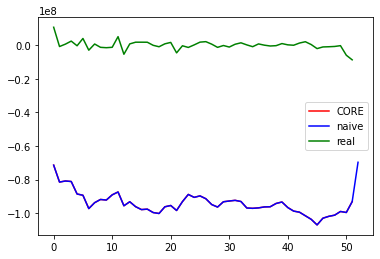

In [50]:
import matplotlib.pyplot as plt 
plt.plot(margins, color='r', label='CORE')
plt.plot(sum_lt_naive, color='b',label='naive')
plt.plot(final_losses, color='g', label='real')
plt.legend()
plt.show()
